# Support Vector Machine (SVM). 
**SVM** is a supervised machine learning algorithm that helps in classification or regression problems. It aims to find an optimal boundary between the possible outputs. 
* SVM tries to find a line that maximizes the separation between a two-class data set of n-dimensional space points. To generalize, the objective is to find a hyperplane that maximizes the separation of the data points to their potential classes in an n-dimensional space. The data points with the minimum distance to the hyperplane (closest points) are called **Support Vectors**.

## Multiclass Classification Using SVM.
In its most simple type, SVM doesn’t support multiclass classification natively. It supports binary classification and separating data points into two classes. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems.

The idea is to map data points to high dimensional space to gain mutual linear separation between every two classes. 
* The approach  which breaks down the multiclass problem into multiple binary classification problems is called a **One-to-One approach**. A binary classifier per each pair of classes.

* The another approach one can use is **One-to-Rest**. In this approach, the breakdown is set to a binary classifier per each class.

A single SVM does binary classification and can differentiate between two classes. So that, according to the two breakdown approaches, to classify data points from m classes data set:

* In the **One-to-Rest approach**, the classifier can use **m** SVMs. Each SVM would predict membership in one of the **m** classes.
* In the **One-to-One approach**, the classifier can use **m(m-1)/2** SVMs.
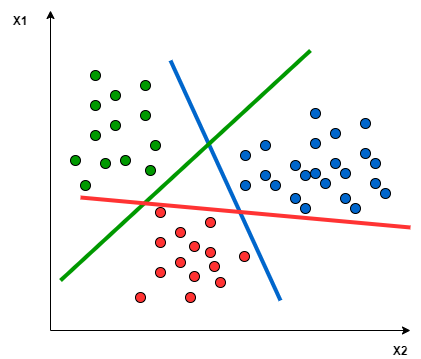

In [1]:
# Import important libraries
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
#Import data file
df = pd.read_csv('C:\\ABC\\NewData.csv')
df.head(10)

,ID,Sensor1,Sensor2,Sensor3,Sensor4,Compound
0,1,7724200,19702100,24094500,239833,Acetone
1,2,7732180,20105200,23921400,239807,Acetone
2,3,7715400,19960900,23898700,239504,Acetone
3,4,7765770,19935600,23244900,239611,Acetone
4,5,7713900,19939200,23230600,239121,Acetone
5,6,7668770,20131300,23661500,238942,Acetone
6,7,7680430,19891200,24438300,239002,Acetone
7,8,7685920,19946200,23650000,238661,Acetone
8,9,7659660,20084000,23766200,238489,Acetone
9,10,7639480,19950700,23848100,238535,Acetone


In [3]:
#Data Overview
df['Compound'].value_counts()

Acetone       1020
Ethanol        781
Xylene         757
Benzene        737
2-propanol     723
Methanol       659
Toluene        651
Name: Compound, dtype: int64

In [4]:
# Removing Unnecessary Column
df.drop("ID", axis=1, inplace = True)

In [5]:
df.shape

(5328, 5)

### Splitting The Data into Training And Testing Dataset for SVM.
The data we use is split into **training data** and **test data**. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.!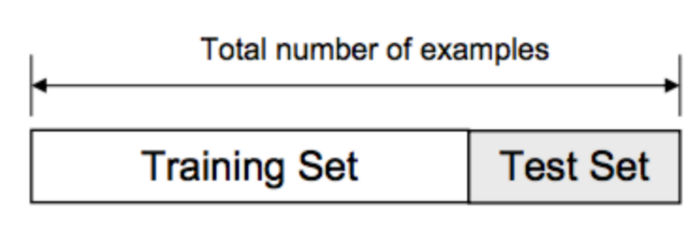

In [6]:
# to split the dataset for training and testing
from sklearn.model_selection import train_test_split 
from sklearn import metrics # for checking the model accuracy
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(3729, 5)
(1599, 5)


In [7]:
X_train = train[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking the training data features
y_train = train.Compound # output of the training data

X_test = test[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking test data feature
y_test = test.Compound # output value of the test data

In [8]:
# View of Our Training Dataset. 
X_train.head()

,Sensor1,Sensor2,Sensor3,Sensor4
2952,4052570,7728080,16635200,198306
3141,4076399,7354490,17013817,196361
1393,4202910,11108500,19519400,369373
954,4225919,13455894,17151517,203085
2293,4190629,12046000,6299840,316715


In [9]:
# View of Our Testing Dataset.
X_test.head()

,Sensor1,Sensor2,Sensor3,Sensor4
675,4074850,14067474,17282164,205099
3215,4021235,7851590,17264772,202220
1410,4167350,13332500,19516500,365781
1824,5098240,18152200,9660080,335402
5004,4441210,13375600,5370890,320154


In [10]:
y_train.head()

2952       Ethanol
3141       Ethanol
1393    2-propanol
954        Acetone
2293       Benzene
Name: Compound, dtype: object

In [12]:
# Important module for SVM algorithm.
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

We’ll create two objects from SVM, to create two different classifiers; one with Polynomial kernel, and another one with RBF kernel:

In [13]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

To calculate the efficiency of the two models, we’ll test the two classifiers using the test data set:

In [14]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

Finally, we will calculate the accuracy and f1 scores for SVM with Polynomial kernel:

In [17]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  95.50
F1 (Polynomial Kernel):  95.52


In [20]:
#Confusion Matrix for SVM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, poly_pred)
cm

array([[205,   4,   0,   0,   0,   0,   0],
       [ 15, 292,   0,   0,   0,   0,   0],
       [  0,   0, 238,   0,   0,   0,   0],
       [ 21,   0,   0, 211,   0,   0,   0],
       [  0,   0,   0,   0, 190,   0,   0],
       [  0,   0,  13,   0,   0, 184,  12],
       [  0,   0,   0,   0,   0,   7, 207]], dtype=int64)

*** Test Accuracy *** 0.9549718574108818


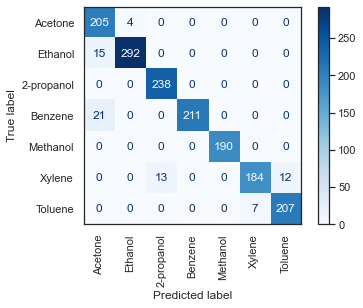

In [26]:
print('*** Test Accuracy ***',poly.score(X_test,y_test))
disp = plot_confusion_matrix(poly, X_test, y_test,
                                 display_labels=['Acetone','Ethanol','2-propanol','Benzene','Methanol','Xylene','Toluene'],
                                 xticks_rotation=90,cmap=plt.cm.Blues,
                             values_format='g'
                            )

For the accuracy score, it shows the percentage of the true positive and true negative to all data points. So, it’s useful when the data set is balanced.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, it’s useful to calculate the f1 score when the data set isn’t balanced.